In [1]:
import os
import pandas as pd, numpy as np
from _config import SEQUENCING_INFO

In [46]:
from _config import OUT_PLACE
all_out =pd.read_csv(os.path.join(OUT_PLACE,"f1_agg_reports/REDUCEDLIB_SMALLMOL191_Nov2019_all_results.csv" ))
lib_out =pd.read_csv(os.path.join(OUT_PLACE,"f1_agg_reports/REDUCEDLIB_SMALLMOL191_Nov2019_library_stats.csv" ))
agg_out =pd.read_csv(os.path.join(OUT_PLACE,"f1_agg_reports/REDUCEDLIB_SMALLMOL191_Nov2019_aggregate_stats.csv" ))
agg_out =agg_out.join(SEQUENCING_INFO[["sample_code"]])

In [78]:

agg_annotated = pd.concat([agg_out.filter(regex="^(?!.*drug_name).*$"),
                           agg_out.Description.str.extract('([^_]*)_')[0].rename("drug_name"),
                           agg_out.sample_code.str.extract('(mESC|U20S)')[0].rename("celltype"),
                           agg_out.sample_code.str.extract('([\.\d]*)uM')[0].rename("concentration").astype(float)], 
                          
                          axis=1).set_index(["drug_name","concentration","celltype","replicate"]).sort_index()

In [79]:
agg_annotated["frac_crispr_of_mapped"].sort_index().groupby(["drug_name","concentration","celltype"]).mean().unstack("concentration")

concentration           0.25      0.50      1.00      2.00      4.00   \
drug_name  celltype                                                     
KU-0060648 U20S      0.002525  0.001435  0.003838  0.007006       NaN   
           mESC      0.049471  0.042324  0.019279  0.012843       NaN   
KU-60019   U20S           NaN  0.003073  0.019072  0.002243  0.002654   
           mESC           NaN  0.058157  0.052199  0.023566  0.015463   
NU7026     U20S           NaN       NaN       NaN       NaN       NaN   
           mESC           NaN       NaN       NaN       NaN       NaN   

concentration           5.00      10.00     20.00  
drug_name  celltype                                
KU-0060648 U20S           NaN       NaN       NaN  
           mESC           NaN       NaN       NaN  
KU-60019   U20S           NaN       NaN       NaN  
           mESC           NaN       NaN       NaN  
NU7026     U20S      0.001977  0.002020  0.002452  
           mESC      0.065198  0.062202  0.030902

In [81]:
agg_annotated.to_csv(os.path.join(OUT_PLACE,"f1_agg_reports/REDUCEDLIB_SMALLMOL191_Nov2019_aggregate_stats_by_drug_concentration_repl.csv"))

In [82]:
import seaborn as sns

In [83]:
agg_annotated.columns

Index(['sample_name', 'n_ins', 'n_all_del', 'n_mh_del', 'n_non_mh_del',
       'n_cas9_total', 'n_wildtype', 'n_other', 'n_total', 'n_total_mapped',
       'frac_non_mh_del_of_crispr', 'frac_mh_del_of_crispr',
       'frac_del_of_crispr', 'frac_ins_of_crispr', 'frac_crispr_of_mapped',
       'Description', 'sample_code'],
      dtype='object')

In [84]:
import matplotlib.pyplot as plt

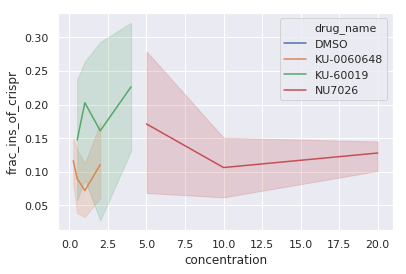

In [88]:
f,subs = plt.subplots(1,1)
f.set_size_inches(6,4)
sns.set()
plt.sca(subs)
sns.lineplot( y = "frac_ins_of_crispr", x= "concentration",hue="drug_name", data = agg_annotated.reset_index())

# plt.sca(subs[1])
# sns.lineplot( y = "frac_crispr_of_mapped", x= "concentration",hue="drug_name", data = agg_annotated.reset_index())

In [86]:
data = agg_annotated.reset_index()

In [93]:
all_out.columns

Index(['Unnamed: 0', 'Category', 'Count', 'Genotype Position',
       'Indel with Mismatches', 'Ins Fivehomopolymer', 'Ins Template Length',
       'Ins Template Orientation', 'Ins mh2', 'Ins p2', 'Inserted Bases',
       'Length', 'Microhomology-Based', '_ExpDir', '_Experiment',
       '_Sequence Context', '_Cutsite', 'sample_name', 'metacat',
       'Description', 'drug_name', 'replicate'],
      dtype='object')

In [101]:
import seaborn as sns

In [129]:
d = all_out.groupby(["drug_short_name","rep","_Experiment","Microhomology-Based"]).mean().Count.unstack("Microhomology-Based")

In [121]:
test = d.yes

In [140]:
all_out["drug_short_name"] =all_out.reset_index().drug_name.str.extract("([^_]*)")
all_out["rep"] =all_out.reset_index().drug_name.str.extract("_r(\d)").astype(int)
all_out["concentration"] =all_out.reset_index().drug_name.str.extract("([\.\d]*)uM").astype(float).fillna(0)

In [141]:
all_out.concentration

0         4.0
1         4.0
2         4.0
3         4.0
4         4.0
5         4.0
6         4.0
7         4.0
8         4.0
9         4.0
10        4.0
11        4.0
12        4.0
13        4.0
14        4.0
15        4.0
16        4.0
17        4.0
18        4.0
19        4.0
20        4.0
21        4.0
22        4.0
23        4.0
24        4.0
25        4.0
26        4.0
27        4.0
28        4.0
29        4.0
         ... 
217577    1.0
217578    1.0
217579    1.0
217580    1.0
217581    1.0
217582    1.0
217583    1.0
217584    1.0
217585    1.0
217586    1.0
217587    1.0
217588    1.0
217589    1.0
217590    1.0
217591    1.0
217592    1.0
217593    1.0
217594    1.0
217595    1.0
217596    1.0
217597    1.0
217598    1.0
217599    1.0
217600    1.0
217601    1.0
217602    1.0
217603    1.0
217604    1.0
217605    1.0
217606    1.0
Name: concentration, Length: 217607, dtype: float64

In [144]:
d = all_out.groupby(["drug_short_name","concentration","rep","_Experiment","Microhomology-Based"]).mean().Count.unstack("Microhomology-Based")

In [ ]:
out = d.reset_index().drug_name.regexextract("[^_]")

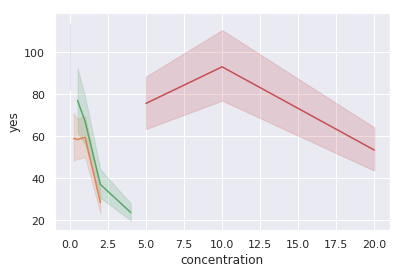

In [146]:
sns.lineplot( hue="drug_short_name",units="", x = "concentration", y="yes", data = d.reset_index(),legend=False)

In [91]:
lib_out.sort_values("predicted_del_of_crispr", ascending = False)

,_Experiment,n_ins,n_all_del,n_mh_del,n_non_mh_del,n_cas9_total,n_wildtype,n_other,n_total,n_total_mapped,...,predicted_del_of_crispr,predicted_ins_of_crispr,predicted_mhdel_of_crispr,predicted_non_mhdel_of_crispr,predicted_precision,deletion_length_r,deletion_length_pval,Description,drug_name,replicate
25,25.0,1462.0,57809.0,48868.0,8941.0,59271.0,992126.0,113299.0,1164696.0,1051397.0,...,0.978004,0.021996,0.978004,0.0,0.859171,0.995470,7.510935e-20,NaN,NaN,NaN
24,24.0,479.0,6450.0,5100.0,1350.0,6929.0,2372128.0,113636.0,2492693.0,2379057.0,...,0.972880,0.027062,0.972880,0.0,0.717661,-0.091184,7.022194e-01,NaN,NaN,NaN
21,21.0,1470.0,22909.0,3956.0,18953.0,24379.0,1110915.0,82363.0,1217657.0,1135294.0,...,0.970655,0.029345,0.970655,0.0,0.822854,0.229475,3.304356e-01,NaN,NaN,NaN
31,31.0,296.0,839.0,649.0,190.0,1135.0,1798977.0,110781.0,1910893.0,1800112.0,...,0.956491,0.043509,0.956491,0.0,0.853006,-0.118943,6.174557e-01,NaN,NaN,NaN
33,33.0,4306.0,46572.0,37222.0,9350.0,50878.0,1611343.0,2812953.0,4475174.0,1662221.0,...,0.956056,0.043944,0.956056,0.0,0.483054,0.903581,4.798958e-08,NaN,NaN,NaN
45,45.0,2247.0,39178.0,26870.0,12308.0,41425.0,1239934.0,216114.0,1497473.0,1281359.0,...,0.955577,0.044423,0.955577,0.0,0.420486,0.923680,6.309800e-09,NaN,NaN,NaN
37,37.0,5264.0,68967.0,63312.0,5655.0,74231.0,1982799.0,143007.0,2200037.0,2057030.0,...,0.955161,0.044839,0.955161,0.0,0.534586,0.972068,8.881627e-13,NaN,NaN,NaN
41,41.0,5565.0,72574.0,63310.0,9264.0,78139.0,1353012.0,165933.0,1597084.0,1431151.0,...,0.955102,0.044898,0.955102,0.0,0.536694,0.969652,1.857506e-12,NaN,NaN,NaN
17,17.0,2964.0,10663.0,5172.0,5491.0,13627.0,1847398.0,221473.0,2082498.0,1861025.0,...,0.941817,0.058183,0.941817,0.0,0.907029,-0.127962,5.908304e-01,NaN,NaN,NaN
27,27.0,1770.0,6260.0,1245.0,5015.0,8030.0,708275.0,87414.0,803719.0,716305.0,...,0.938696,0.061304,0.938696,0.0,0.900618,-0.097554,6.824196e-01,NaN,NaN,NaN


In [87]:
data.iloc[:4].groupby("celltype").frac_ins_of_crispr.mean().rename("DMSO CONTROLS")

celltype
U20S    0.142106
mESC    0.176789
Name: DMSO CONTROLS, dtype: float64